Import Necessary Modules

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# TA-Lib for indicators
import talib

# PyNance and PyFolio will be used later, we just import them now
import talib                      # technical indicators
import pynance as py              # from GitHub version



In [207]:
# Loading all data
df_aapl= pd.read_csv("../data/AAPL.csv")
df_amzn= pd.read_csv("../data/AMZN.csv")
df_goog= pd.read_csv("../data/GOOG.csv")
df_meta= pd.read_csv("../data/META.csv")
df_msft= pd.read_csv("../data/MSFT.csv")
df_nvda= pd.read_csv("../data/NVDA.csv")


In [208]:
if isinstance(df_aapl.columns, pd.MultiIndex):
    df_aapl.columns = df_aapl.columns.get_level_values(0)  # keep only first level: Open, High, etc.

print("Cleaned columns:", df_aapl.columns.tolist())

# Creating a dictionary for easier management
dfs = {
    "AAPL" : df_aapl,
    "AMZN" : df_amzn,
    "GOOG" : df_goog,
    "META" : df_meta,
    "MSFT" : df_msft,
    "NVDA" : df_nvda
}

for tk, df in dfs.items():
    df["Ticker"]=tk # adding ticker column corresponding to dataframes

df_aapl.head() # viewing sample dataframe

Cleaned columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


,Date,Close,High,Low,Open,Volume,Ticker
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200,AAPL
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400,AAPL
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400,AAPL
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800,AAPL
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800,AAPL


In [209]:
# Concatenating the dataframes
concat_df = pd.concat(dfs.values(), ignore_index=True)

print(concat_df["Ticker"].value_counts()) # Ensuring that all tickers have been added

# Indexing the date and sorting it
concat_df = concat_df.set_index('Date') 
concat_df.index = pd.to_datetime(concat_df.index) 
concat_df = concat_df.sort_index()

Ticker
AAPL    3774
AMZN    3774
GOOG    3774
MSFT    3774
NVDA    3774
META    2923
Name: count, dtype: int64


Calculate SMA, EMA, RSI, MACD, MACD_signal, MACD_hist

In [210]:
# Importing necessary modules and defining path for importing locally created modules
import sys
from pathlib import Path

project_root = Path("..").resolve()
src_path = project_root / "src"

sys.path.append(str(project_root))
sys.path.append(str(src_path))

In [211]:
# Importing technical indicator calculator for modularity
from indicators import add_technical_indicators

In [212]:
df_aapl = add_technical_indicators(df_aapl)
df_aapl = df_aapl.set_index('Date') 
df_aapl.index = pd.to_datetime(df_aapl.index) 
df_aapl = df_aapl.sort_index()
df_aapl.tail(5)

,Close,High,Low,Open,Volume,Ticker,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,AAPL,191.856618,191.510231,54.672784,2.633141,3.235256,-0.602115
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,AAPL,192.018094,191.484867,53.090049,2.304751,3.049155,-0.744404
2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700,AAPL,192.154308,191.471353,53.354446,2.029104,2.845145,-0.816041
2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900,AAPL,192.362839,191.499696,54.540999,1.823998,2.640915,-0.816918
2023-12-29,190.728775,192.581275,189.936256,192.085953,42672100,AAPL,192.490633,191.426275,51.121347,1.559539,2.424640,-0.865101


In [194]:
add_technical_indicators(df_amzn).tail(5)

,Date,Close,High,Low,Open,Volume,Ticker,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,153.419998,154.350006,152.710007,153.770004,29514100,AMZN,148.578999,148.860492,64.115558,3.135958,2.873052,0.262905
3770,2023-12-26,153.410004,153.979996,153.029999,153.559998,25067200,AMZN,148.863000,149.293779,64.085644,3.118650,2.922172,0.196478
3771,2023-12-27,153.339996,154.779999,153.119995,153.559998,31434700,AMZN,149.178500,149.679133,63.860893,3.063965,2.950530,0.113434
3772,2023-12-28,153.380005,154.080002,152.949997,153.720001,27057000,AMZN,149.531499,150.031597,63.938728,2.989395,2.958303,0.031092
3773,2023-12-29,151.940002,153.889999,151.029999,153.100006,39823200,AMZN,149.824000,150.213350,59.012257,2.782032,2.923049,-0.141017


In [195]:
add_technical_indicators(df_goog).tail(5)

,Date,Close,High,Low,Open,Volume,Ticker,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,141.750000,142.276397,141.089511,141.164014,18513500,GOOG,135.009596,135.854576,64.953309,1.412015,0.572046,0.839969
3770,2023-12-26,141.849304,142.966658,141.531472,142.008205,11170100,GOOG,135.246477,136.425503,65.115870,1.706565,0.798950,0.907615
3771,2023-12-27,140.478683,142.345911,140.092320,141.859236,17288400,GOOG,135.386520,136.811520,60.916026,1.808553,1.000870,0.807682
3772,2023-12-28,140.319748,141.303025,139.870824,140.885881,12192500,GOOG,135.628861,137.145637,60.429303,1.855168,1.171730,0.683438
3773,2023-12-29,139.972137,140.473710,138.949139,139.723837,14881000,GOOG,135.976979,137.414827,59.313063,1.842820,1.305948,0.536872


In [196]:
add_technical_indicators(df_meta).tail(5)

,Date,Close,High,Low,Open,Volume,Ticker,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
2918,2023-12-22,351.224823,355.011477,349.068105,353.401377,11772800,META,332.302945,335.581703,67.333885,6.945367,4.729907,2.215461
2919,2023-12-26,352.655975,354.792827,351.284456,352.814999,9898600,META,333.303278,337.207824,68.187000,7.436800,5.271285,2.165514
2920,2023-12-27,355.637543,356.800387,353.132994,353.888347,13207900,META,334.239505,338.963036,69.947874,7.974921,5.812012,2.162908
2921,2023-12-28,356.124634,359.682686,355.617749,357.496184,11798800,META,335.537503,340.597473,70.237702,8.344500,6.318510,2.025990
2922,2023-12-29,351.791290,357.794292,349.664418,356.790470,14987100,META,336.869788,341.663551,64.296803,8.193282,6.693464,1.499818


In [197]:
add_technical_indicators(df_msft).tail(5)

,Date,Close,High,Low,Open,Volume,Ticker,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,369.767883,370.360181,367.921911,368.879451,17107500,MSFT,368.730389,366.580145,56.363342,2.805416,3.840081,-1.034664
3770,2023-12-26,369.846832,372.097540,368.701731,370.182461,12673100,MSFT,368.535426,366.891259,56.447998,2.767033,3.625471,-0.858438
3771,2023-12-27,369.264465,370.241738,368.020642,368.889342,14905400,MSFT,368.109468,367.117278,55.591261,2.658971,3.432171,-0.773200
3772,2023-12-28,370.458862,371.623696,369.353256,370.547702,14327000,MSFT,367.933260,367.435524,57.031664,2.639285,3.273594,-0.634309
3773,2023-12-29,371.209198,372.314805,368.682088,371.169703,18730800,MSFT,367.791606,367.794922,57.954296,2.653640,3.149603,-0.495963


In [198]:
add_technical_indicators(df_nvda).tail(5)

,Date,Close,High,Low,Open,Volume,Ticker,SMA_20,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,48.805527,49.358247,48.442706,49.170342,252507000,NVDA,47.706983,48.024644,55.352119,0.634352,0.564438,0.069914
3770,2023-12-26,49.254299,49.575137,48.935459,48.943454,244200000,NVDA,47.759019,48.141754,57.245971,0.655689,0.582688,0.073001
3771,2023-12-27,49.392231,49.655100,49.060397,49.486186,233648000,NVDA,47.838989,48.260847,57.837928,0.675937,0.601338,0.074599
3772,2023-12-28,49.497185,49.859003,49.387239,49.618126,246587000,NVDA,47.908266,48.378593,58.310919,0.692470,0.619564,0.072906
3773,2023-12-29,49.497185,49.971949,48.726571,49.788039,389293000,NVDA,48.046003,48.485126,58.310919,0.697532,0.635158,0.062374


Visualizing the Technical Indicators

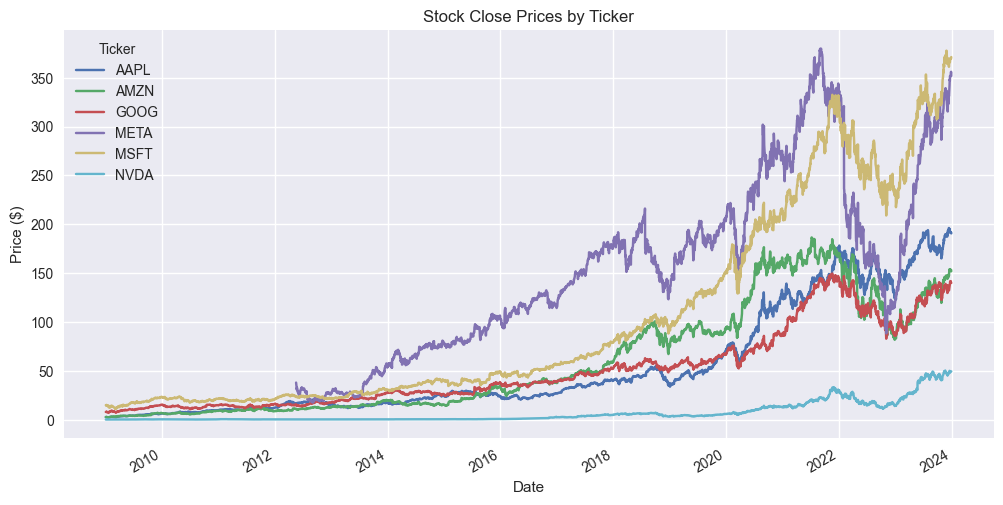

In [199]:
# Using the concatenated dataframe to compare the Close Prices of all Tickers

pivot_df = concat_df.pivot(columns='Ticker', values='Close')
# Plot all tickers
pivot_df.plot(figsize=(12,6), title="Stock Close Prices by Ticker")
plt.ylabel("Price ($)")
plt.xlabel("Date")
plt.legend(title="Ticker")
plt.show()



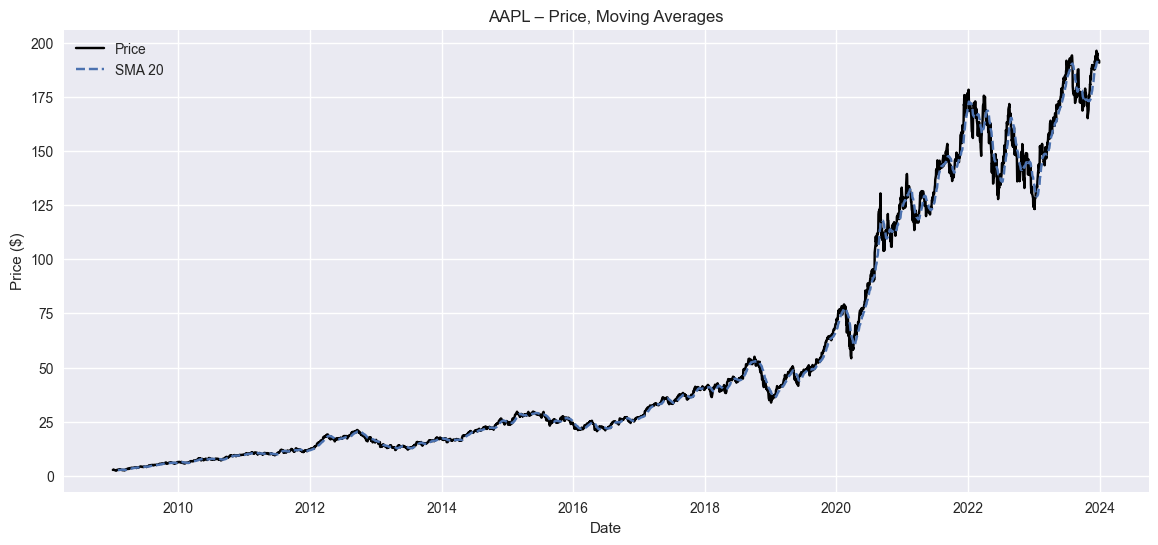

In [200]:
# Viewing the relationship between calculated SMA and the Close price for AAPL ticker

price = df_aapl["Close"]

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df_aapl.index, price, label="Price", color="black") # Close Price line
ax.plot(df_aapl.index, df_aapl["SMA_20"], label="SMA 20", linestyle="--") # SMA line


ax.set_title("AAPL – Price, Moving Averages")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()
plt.show()

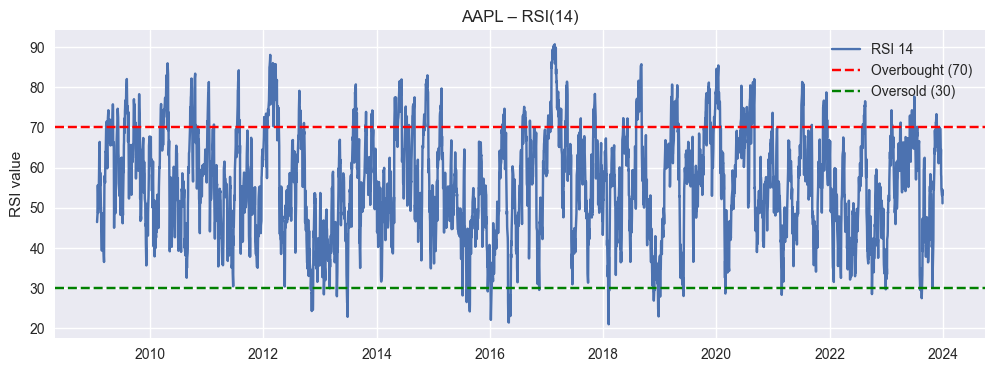

In [201]:
# Viewing the relationship between calculated RSI and Close price for AAPM ticker

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df_aapl.index, df_aapl["RSI_14"], label="RSI 14") # seeing the trend over the years
ax.axhline(70, color="red", linestyle="--", label="Overbought (70)") # defining the threshold for overbought
ax.axhline(30, color="green", linestyle="--", label="Oversold (30)") # defining the threshold for oversold

ax.set_title("AAPL – RSI(14)")
ax.set_ylabel("RSI value")
ax.legend()
plt.show()


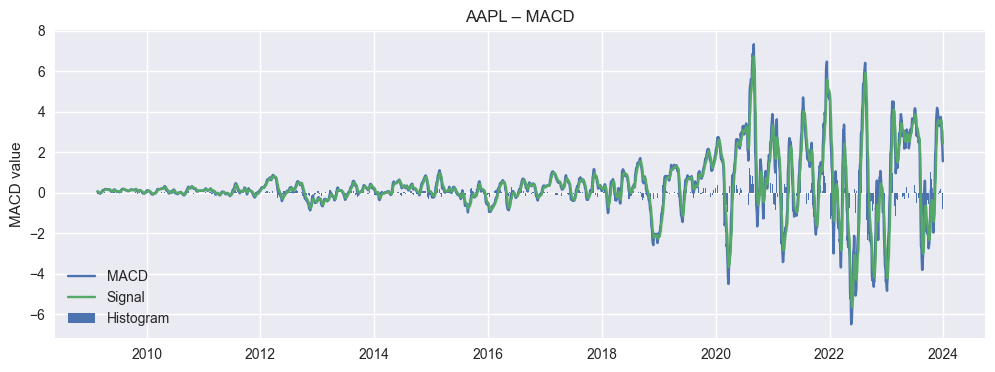

In [202]:
# Viewing the relationship between MACD and the Close price for AAPL ticker

fig, ax = plt.subplots(figsize=(12, 4))

# for all MACD related indicators different plotting means is used for easier identification
ax.plot(df_aapl.index, df_aapl["MACD"], label="MACD")
ax.plot(df_aapl.index, df_aapl["MACD_signal"], label="Signal")
ax.bar(df_aapl.index, df_aapl["MACD_hist"], label="Histogram")

ax.set_title("AAPL – MACD")
ax.set_ylabel("MACD value")
ax.legend()
plt.show()


In [203]:


from pynance import portfolio_optimizer as po

TICKERS = ["AAPL", "MSFT", "META", "NVDA","TSLA"]

# Create the portfolio calculations object
portfolio = po.PortfolioCalculations(TICKERS)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df").head())

print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df").head())


c:\Users\mihret.mekbebe\venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\mihret.mekbebe\venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\mihret.mekbebe\venv\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  81.98%
Standard Deviation               46.37%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
AAPL           12.31%
MSFT            0.00%
META            0.00%
NVDA           87.69%
TSLA            0.00%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               20.48%
Standard Deviation            20.27%

=== Min Variance Portfolio weights ===
     Portfolio Weight
AAPL           42.17%
MSFT           56.13%
META            1.69%
NVDA            0.00%
TSLA            0.00%
